In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from numpy import genfromtxt

In [2]:
plt.rcParams['figure.dpi'] = 150

# Logistic Class

In [81]:
class LogisticRegression:

    def __init__(self, init_theta=None, alpha=0.01, n_iter=100):
        '''
        Constructor
        '''
        self.alpha = alpha
        self.n_iter = n_iter
        self.theta = init_theta
        self.JHist = None
        
    def h_theta(self, X, theta):
        '''
        Calculates sigmoid function
        Arguments:
            X is a n-by-d numpy matrix
            theta is a d-dimensional numpy vector
        Returns:
            sigmoid function of theta*X
        '''    
        h_theta = 1 / (1+np.exp(-1*np.matmul(X, theta)))
        return h_theta

    def gradientDescent(self, X, y, theta):
        '''
        Fits the model via gradient descent
        Arguments:
            X is a n-by-d numpy matrix
            y is an n-dimensional numpy vector
            theta is a d-dimensional numpy vector
        Returns:
            the final theta found by gradient descent
        '''
        n,d = X.shape
        self.JHist = []
        sum = 0
        for i in range(self.n_iter):
            self.JHist.append((self.computeCost(X, y, theta), theta))
            print("Iteration: ", i+1, " Cost: ", self.JHist[i][0])
            theta = theta - (self.alpha / n * np.matmul(X.T, (self.h_theta(X, theta)-y)))
#         print(" Cost: ", self.JHist[i][0], " Theta: ", theta)
        return theta

    def computeCost(self, X, y, theta):
        '''
        Computes the objective function
        Arguments:
          X is a n-by-d numpy matrix
          y is an n-dimensional numpy vector
          theta is a d-dimensional numpy vector
        Returns:
          a scalar value of the cost  
              ** make certain you don't return a matrix with just one value! **
        '''
        n,d = X.shape
        cost = -1 / n * (np.matmul(y.T, np.log(self.h_theta(X, theta)))+np.matmul((1-(y.T)), np.log(1-self.h_theta(X, theta))))
        return cost[0, 0]


    def fit(self, X, y):
        '''
        Trains the model
        Arguments:
            X is a n-by-d numpy matrix
            y is an n-dimensional numpy vector
        '''
        n = len(y)
        n,d = X.shape
        if self.theta is None:
            self.theta = np.matrix(np.zeros((d,1)))
        self.theta = self.gradientDescent(X,y,self.theta)

    def predict(self, X):
        '''
        Used the model to predict values for each instance in X
        Arguments:
            X is a n-by-d numpy matrix
        Returns:
            an n-dimensional numpy vector of the predictions
        '''
        y_pred = self.h_theta(X, self.theta)
        return y_pred


# Heart Disease Problem

## Loading and Prepairing Data + Fitting the Model

In [181]:
import numpy as np
from numpy.linalg import *
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

if __name__ == "__main__":
    '''
        Main function to test multivariate linear regression
    '''
    
    # load the data
    filePath = "D:\\PhD Courses\\Machine Learning\\Assignments\\ML_Assignment_2\\Data\\heart.csv"
    allData = pd.read_csv(filePath)
    X = np.matrix(allData.iloc[:,:-1])
    y = np.matrix((allData.iloc[:,-1])).T
    
    # 80 20 splitt and standardizing data
    # stratify to balance labels in train and test datasets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True, stratify=y)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    n_train,d = X_train.shape
    
    # Add a row of ones for the bias term
    X_train = np.c_[np.ones((n_train,1)), X_train]
    
    # initialize the model
    init_theta = np.matrix(np.random.randn((d+1))).T
    n_iter = 10000
    alpha = 0.01
    
    log_reg = LogisticRegression(init_theta, alpha, n_iter)
    log_reg.fit(X_train, y_train)


Iteration:  1  Cost:  1.4020074146429953
Iteration:  2  Cost:  1.3971271240759586
Iteration:  3  Cost:  1.3922744063729946
Iteration:  4  Cost:  1.3874491070793156
Iteration:  5  Cost:  1.3826510718638547
Iteration:  6  Cost:  1.3778801465463564
Iteration:  7  Cost:  1.373136177123608
Iteration:  8  Cost:  1.3684190097948448
Iteration:  9  Cost:  1.3637284909862375
Iteration:  10  Cost:  1.3590644673746526
Iteration:  11  Cost:  1.3544267859105077
Iteration:  12  Cost:  1.3498152938399162
Iteration:  13  Cost:  1.3452298387260013
Iteration:  14  Cost:  1.3406702684695093
Iteration:  15  Cost:  1.336136431328647
Iteration:  16  Cost:  1.3316281759382191
Iteration:  17  Cost:  1.3271453513280556
Iteration:  18  Cost:  1.3226878069407662
Iteration:  19  Cost:  1.318255392648815
Iteration:  20  Cost:  1.3138479587709728
Iteration:  21  Cost:  1.3094653560881029
Iteration:  22  Cost:  1.3051074358583576
Iteration:  23  Cost:  1.300774049831749
Iteration:  24  Cost:  1.2964650502641886
Itera

Iteration:  405  Cost:  0.585658287574356
Iteration:  406  Cost:  0.5849893651135403
Iteration:  407  Cost:  0.5843231471463457
Iteration:  408  Cost:  0.5836596194440645
Iteration:  409  Cost:  0.5829987678666091
Iteration:  410  Cost:  0.5823405783620049
Iteration:  411  Cost:  0.5816850369658819
Iteration:  412  Cost:  0.5810321298009696
Iteration:  413  Cost:  0.5803818430765918
Iteration:  414  Cost:  0.5797341630881634
Iteration:  415  Cost:  0.5790890762166877
Iteration:  416  Cost:  0.5784465689282565
Iteration:  417  Cost:  0.5778066277735499
Iteration:  418  Cost:  0.5771692393873374
Iteration:  419  Cost:  0.5765343904879834
Iteration:  420  Cost:  0.5759020678769488
Iteration:  421  Cost:  0.5752722584382992
Iteration:  422  Cost:  0.574644949138211
Iteration:  423  Cost:  0.5740201270244809
Iteration:  424  Cost:  0.5733977792260355
Iteration:  425  Cost:  0.5727778929524441
Iteration:  426  Cost:  0.57216045549343
Iteration:  427  Cost:  0.5715454542183872
Iteration:  428

Iteration:  746  Cost:  0.4547958941098453
Iteration:  747  Cost:  0.4545880866077512
Iteration:  748  Cost:  0.4543809006197877
Iteration:  749  Cost:  0.45417433390339995
Iteration:  750  Cost:  0.4539683842254663
Iteration:  751  Cost:  0.4537630493622491
Iteration:  752  Cost:  0.45355832709934535
Iteration:  753  Cost:  0.4533542152316385
Iteration:  754  Cost:  0.4531507115632494
Iteration:  755  Cost:  0.45294781390748856
Iteration:  756  Cost:  0.45274552008680874
Iteration:  757  Cost:  0.45254382793275705
Iteration:  758  Cost:  0.45234273528592833
Iteration:  759  Cost:  0.4521422399959188
Iteration:  760  Cost:  0.45194233992127925
Iteration:  761  Cost:  0.4517430329294694
Iteration:  762  Cost:  0.45154431689681207
Iteration:  763  Cost:  0.45134618970844814
Iteration:  764  Cost:  0.4511486492582916
Iteration:  765  Cost:  0.45095169344898467
Iteration:  766  Cost:  0.4507553201918536
Iteration:  767  Cost:  0.450559527406865
Iteration:  768  Cost:  0.4503643130225815
It

Iteration:  1132  Cost:  0.40563789198706357
Iteration:  1133  Cost:  0.4055636528083631
Iteration:  1134  Cost:  0.4054895886129857
Iteration:  1135  Cost:  0.40541569888075996
Iteration:  1136  Cost:  0.40534198309332803
Iteration:  1137  Cost:  0.4052684407341382
Iteration:  1138  Cost:  0.4051950712884378
Iteration:  1139  Cost:  0.40512187424326646
Iteration:  1140  Cost:  0.4050488490874489
Iteration:  1141  Cost:  0.40497599531158834
Iteration:  1142  Cost:  0.40490331240805927
Iteration:  1143  Cost:  0.4048307998710009
Iteration:  1144  Cost:  0.40475845719631
Iteration:  1145  Cost:  0.4046862838816341
Iteration:  1146  Cost:  0.4046142794263654
Iteration:  1147  Cost:  0.40454244333163303
Iteration:  1148  Cost:  0.40447077510029683
Iteration:  1149  Cost:  0.4043992742369408
Iteration:  1150  Cost:  0.40432794024786617
Iteration:  1151  Cost:  0.40425677264108467
Iteration:  1152  Cost:  0.40418577092631247
Iteration:  1153  Cost:  0.4041149346149628
Iteration:  1154  Cost:

Iteration:  1433  Cost:  0.38934383576454606
Iteration:  1434  Cost:  0.38930506293892897
Iteration:  1435  Cost:  0.38926636652970653
Iteration:  1436  Cost:  0.38922774634365565
Iteration:  1437  Cost:  0.38918920218814973
Iteration:  1438  Cost:  0.3891507338711574
Iteration:  1439  Cost:  0.38911234120123983
Iteration:  1440  Cost:  0.389074023987549
Iteration:  1441  Cost:  0.3890357820398252
Iteration:  1442  Cost:  0.38899761516839554
Iteration:  1443  Cost:  0.3889595231841715
Iteration:  1444  Cost:  0.38892150589864716
Iteration:  1445  Cost:  0.3888835631238965
Iteration:  1446  Cost:  0.38884569467257274
Iteration:  1447  Cost:  0.38880790035790463
Iteration:  1448  Cost:  0.38877017999369584
Iteration:  1449  Cost:  0.3887325333943221
Iteration:  1450  Cost:  0.38869496037472984
Iteration:  1451  Cost:  0.3886574607504335
Iteration:  1452  Cost:  0.38862003433751413
Iteration:  1453  Cost:  0.3885826809526172
Iteration:  1454  Cost:  0.38854540041295055
Iteration:  1455  C

Iteration:  1703  Cost:  0.3811320969805146
Iteration:  1704  Cost:  0.38110850141676794
Iteration:  1705  Cost:  0.381084946410527
Iteration:  1706  Cost:  0.3810614318740042
Iteration:  1707  Cost:  0.38103795771965343
Iteration:  1708  Cost:  0.3810145238601678
Iteration:  1709  Cost:  0.38099113020848024
Iteration:  1710  Cost:  0.3809677766777615
Iteration:  1711  Cost:  0.38094446318142033
Iteration:  1712  Cost:  0.38092118963310234
Iteration:  1713  Cost:  0.3808979559466892
Iteration:  1714  Cost:  0.38087476203629783
Iteration:  1715  Cost:  0.3808516078162797
Iteration:  1716  Cost:  0.3808284932012204
Iteration:  1717  Cost:  0.38080541810593854
Iteration:  1718  Cost:  0.38078238244548474
Iteration:  1719  Cost:  0.3807593861351415
Iteration:  1720  Cost:  0.3807364290904222
Iteration:  1721  Cost:  0.38071351122707014
Iteration:  1722  Cost:  0.38069063246105805
Iteration:  1723  Cost:  0.3806677927085875
Iteration:  1724  Cost:  0.3806449918860875
Iteration:  1725  Cost:

Iteration:  2048  Cost:  0.3749168363102491
Iteration:  2049  Cost:  0.37490329587273835
Iteration:  2050  Cost:  0.37488977598313095
Iteration:  2051  Cost:  0.37487627660455186
Iteration:  2052  Cost:  0.3748627977002103
Iteration:  2053  Cost:  0.3748493392333993
Iteration:  2054  Cost:  0.3748359011674952
Iteration:  2055  Cost:  0.37482248346595776
Iteration:  2056  Cost:  0.3748090860923299
Iteration:  2057  Cost:  0.3747957090102372
Iteration:  2058  Cost:  0.37478235218338785
Iteration:  2059  Cost:  0.3747690155755725
Iteration:  2060  Cost:  0.3747556991506639
Iteration:  2061  Cost:  0.3747424028726166
Iteration:  2062  Cost:  0.37472912670546665
Iteration:  2063  Cost:  0.37471587061333195
Iteration:  2064  Cost:  0.37470263456041125
Iteration:  2065  Cost:  0.37468941851098436
Iteration:  2066  Cost:  0.3746762224294118
Iteration:  2067  Cost:  0.37466304628013447
Iteration:  2068  Cost:  0.37464989002767385
Iteration:  2069  Cost:  0.3746367536366311
Iteration:  2070  Cos

Iteration:  2412  Cost:  0.37110174408120755
Iteration:  2413  Cost:  0.3710937775246426
Iteration:  2414  Cost:  0.3710858221795068
Iteration:  2415  Cost:  0.3710778780283571
Iteration:  2416  Cost:  0.3710699450537827
Iteration:  2417  Cost:  0.37106202323840487
Iteration:  2418  Cost:  0.3710541125648773
Iteration:  2419  Cost:  0.37104621301588553
Iteration:  2420  Cost:  0.37103832457414704
Iteration:  2421  Cost:  0.3710304472224114
Iteration:  2422  Cost:  0.37102258094345963
Iteration:  2423  Cost:  0.37101472572010497
Iteration:  2424  Cost:  0.37100688153519173
Iteration:  2425  Cost:  0.37099904837159636
Iteration:  2426  Cost:  0.37099122621222674
Iteration:  2427  Cost:  0.37098341504002175
Iteration:  2428  Cost:  0.3709756148379522
Iteration:  2429  Cost:  0.3709678255890197
Iteration:  2430  Cost:  0.3709600472762574
Iteration:  2431  Cost:  0.3709522798827295
Iteration:  2432  Cost:  0.3709445233915314
Iteration:  2433  Cost:  0.3709367777857891
Iteration:  2434  Cost

Iteration:  2762  Cost:  0.3688916535848308
Iteration:  2763  Cost:  0.3688867352283314
Iteration:  2764  Cost:  0.36888182351823134
Iteration:  2765  Cost:  0.36887691844493214
Iteration:  2766  Cost:  0.36887201999885055
Iteration:  2767  Cost:  0.36886712817041883
Iteration:  2768  Cost:  0.3688622429500841
Iteration:  2769  Cost:  0.3688573643283086
Iteration:  2770  Cost:  0.3688524922955701
Iteration:  2771  Cost:  0.36884762684236083
Iteration:  2772  Cost:  0.36884276795918863
Iteration:  2773  Cost:  0.3688379156365759
Iteration:  2774  Cost:  0.3688330698650605
Iteration:  2775  Cost:  0.36882823063519476
Iteration:  2776  Cost:  0.36882339793754637
Iteration:  2777  Cost:  0.36881857176269767
Iteration:  2778  Cost:  0.368813752101246
Iteration:  2779  Cost:  0.36880893894380345
Iteration:  2780  Cost:  0.3688041322809972
Iteration:  2781  Cost:  0.36879933210346877
Iteration:  2782  Cost:  0.36879453840187476
Iteration:  2783  Cost:  0.36878975116688656
Iteration:  2784  Co

Iteration:  3209  Cost:  0.3672351439031364
Iteration:  3210  Cost:  0.36723242556352603
Iteration:  3211  Cost:  0.36722971075979627
Iteration:  3212  Cost:  0.367226999487044
Iteration:  3213  Cost:  0.36722429174037374
Iteration:  3214  Cost:  0.36722158751489653
Iteration:  3215  Cost:  0.3672188868057306
Iteration:  3216  Cost:  0.36721618960800156
Iteration:  3217  Cost:  0.36721349591684177
Iteration:  3218  Cost:  0.3672108057273906
Iteration:  3219  Cost:  0.3672081190347946
Iteration:  3220  Cost:  0.36720543583420723
Iteration:  3221  Cost:  0.36720275612078895
Iteration:  3222  Cost:  0.3672000798897073
Iteration:  3223  Cost:  0.36719740713613663
Iteration:  3224  Cost:  0.3671947378552584
Iteration:  3225  Cost:  0.3671920720422611
Iteration:  3226  Cost:  0.36718940969233976
Iteration:  3227  Cost:  0.3671867508006969
Iteration:  3228  Cost:  0.3671840953625415
Iteration:  3229  Cost:  0.3671814433730897
Iteration:  3230  Cost:  0.3671787948275646
Iteration:  3231  Cost:

Iteration:  3558  Cost:  0.3664706144954559
Iteration:  3559  Cost:  0.3664688763001332
Iteration:  3560  Cost:  0.3664671402934138
Iteration:  3561  Cost:  0.3664654064723197
Iteration:  3562  Cost:  0.36646367483387676
Iteration:  3563  Cost:  0.36646194537511545
Iteration:  3564  Cost:  0.3664602180930701
Iteration:  3565  Cost:  0.3664584929847795
Iteration:  3566  Cost:  0.3664567700472865
Iteration:  3567  Cost:  0.3664550492776381
Iteration:  3568  Cost:  0.3664533306728856
Iteration:  3569  Cost:  0.3664516142300844
Iteration:  3570  Cost:  0.36644989994629396
Iteration:  3571  Cost:  0.3664481878185782
Iteration:  3572  Cost:  0.3664464778440048
Iteration:  3573  Cost:  0.36644477001964604
Iteration:  3574  Cost:  0.366443064342578
Iteration:  3575  Cost:  0.36644136080988093
Iteration:  3576  Cost:  0.36643965941863943
Iteration:  3577  Cost:  0.36643796016594204
Iteration:  3578  Cost:  0.3664362630488814
Iteration:  3579  Cost:  0.36643456806455443
Iteration:  3580  Cost:  

Iteration:  3898  Cost:  0.3659885204395467
Iteration:  3899  Cost:  0.365987379094949
Iteration:  3900  Cost:  0.3659862391343749
Iteration:  3901  Cost:  0.3659851005559815
Iteration:  3902  Cost:  0.36598396335792827
Iteration:  3903  Cost:  0.36598282753837724
Iteration:  3904  Cost:  0.3659816930954932
Iteration:  3905  Cost:  0.36598056002744334
Iteration:  3906  Cost:  0.36597942833239755
Iteration:  3907  Cost:  0.3659782980085282
Iteration:  3908  Cost:  0.3659771690540103
Iteration:  3909  Cost:  0.36597604146702134
Iteration:  3910  Cost:  0.36597491524574144
Iteration:  3911  Cost:  0.36597379038835326
Iteration:  3912  Cost:  0.36597266689304203
Iteration:  3913  Cost:  0.3659715447579956
Iteration:  3914  Cost:  0.36597042398140406
Iteration:  3915  Cost:  0.36596930456146043
Iteration:  3916  Cost:  0.3659681864963601
Iteration:  3917  Cost:  0.365967069784301
Iteration:  3918  Cost:  0.3659659544234835
Iteration:  3919  Cost:  0.3659648404121105
Iteration:  3920  Cost: 

Iteration:  4339  Cost:  0.36559687165598354
Iteration:  4340  Cost:  0.3655961935306887
Iteration:  4341  Cost:  0.36559551618273506
Iteration:  4342  Cost:  0.3655948396111278
Iteration:  4343  Cost:  0.36559416381487325
Iteration:  4344  Cost:  0.36559348879297937
Iteration:  4345  Cost:  0.36559281454445486
Iteration:  4346  Cost:  0.36559214106831056
Iteration:  4347  Cost:  0.3655914683635582
Iteration:  4348  Cost:  0.3655907964292113
Iteration:  4349  Cost:  0.365590125264284
Iteration:  4350  Cost:  0.36558945486779265
Iteration:  4351  Cost:  0.3655887852387545
Iteration:  4352  Cost:  0.3655881163761882
Iteration:  4353  Cost:  0.36558744827911377
Iteration:  4354  Cost:  0.3655867809465527
Iteration:  4355  Cost:  0.36558611437752786
Iteration:  4356  Cost:  0.3655854485710631
Iteration:  4357  Cost:  0.3655847835261842
Iteration:  4358  Cost:  0.3655841192419177
Iteration:  4359  Cost:  0.36558345571729195
Iteration:  4360  Cost:  0.3655827929513364
Iteration:  4361  Cost:

Iteration:  4721  Cost:  0.36538630816316864
Iteration:  4722  Cost:  0.3653858657231406
Iteration:  4723  Cost:  0.3653854237646546
Iteration:  4724  Cost:  0.36538498228712146
Iteration:  4725  Cost:  0.3653845412899523
Iteration:  4726  Cost:  0.365384100772559
Iteration:  4727  Cost:  0.36538366073435463
Iteration:  4728  Cost:  0.36538322117475275
Iteration:  4729  Cost:  0.36538278209316777
Iteration:  4730  Cost:  0.365382343489015
Iteration:  4731  Cost:  0.3653819053617104
Iteration:  4732  Cost:  0.3653814677106707
Iteration:  4733  Cost:  0.3653810305353136
Iteration:  4734  Cost:  0.3653805938350575
Iteration:  4735  Cost:  0.36538015760932147
Iteration:  4736  Cost:  0.36537972185752543
Iteration:  4737  Cost:  0.36537928657909025
Iteration:  4738  Cost:  0.36537885177343726
Iteration:  4739  Cost:  0.36537841743998883
Iteration:  4740  Cost:  0.3653779835781681
Iteration:  4741  Cost:  0.36537755018739876
Iteration:  4742  Cost:  0.36537711726710564
Iteration:  4743  Cost

Iteration:  5083  Cost:  0.3652534942461863
Iteration:  5084  Cost:  0.36525319312030885
Iteration:  5085  Cost:  0.36525289230669533
Iteration:  5086  Cost:  0.3652525918049813
Iteration:  5087  Cost:  0.36525229161480294
Iteration:  5088  Cost:  0.36525199173579664
Iteration:  5089  Cost:  0.36525169216759956
Iteration:  5090  Cost:  0.36525139290984926
Iteration:  5091  Cost:  0.3652510939621837
Iteration:  5092  Cost:  0.3652507953242412
Iteration:  5093  Cost:  0.3652504969956609
Iteration:  5094  Cost:  0.36525019897608213
Iteration:  5095  Cost:  0.3652499012651448
Iteration:  5096  Cost:  0.36524960386248917
Iteration:  5097  Cost:  0.36524930676775613
Iteration:  5098  Cost:  0.36524900998058696
Iteration:  5099  Cost:  0.3652487135006233
Iteration:  5100  Cost:  0.3652484173275075
Iteration:  5101  Cost:  0.36524812146088215
Iteration:  5102  Cost:  0.3652478259003905
Iteration:  5103  Cost:  0.36524753064567606
Iteration:  5104  Cost:  0.36524723569638295
Iteration:  5105  C

Iteration:  5545  Cost:  0.36514246437513387
Iteration:  5546  Cost:  0.36514227536432786
Iteration:  5547  Cost:  0.3651420865387002
Iteration:  5548  Cost:  0.36514189789804813
Iteration:  5549  Cost:  0.36514170944216945
Iteration:  5550  Cost:  0.3651415211708621
Iteration:  5551  Cost:  0.36514133308392394
Iteration:  5552  Cost:  0.36514114518115326
Iteration:  5553  Cost:  0.3651409574623488
Iteration:  5554  Cost:  0.3651407699273094
Iteration:  5555  Cost:  0.365140582575834
Iteration:  5556  Cost:  0.3651403954077221
Iteration:  5557  Cost:  0.36514020842277317
Iteration:  5558  Cost:  0.36514002162078707
Iteration:  5559  Cost:  0.3651398350015637
Iteration:  5560  Cost:  0.3651396485649036
Iteration:  5561  Cost:  0.3651394623106072
Iteration:  5562  Cost:  0.36513927623847536
Iteration:  5563  Cost:  0.36513909034830916
Iteration:  5564  Cost:  0.3651389046399097
Iteration:  5565  Cost:  0.36513871911307877
Iteration:  5566  Cost:  0.36513853376761807
Iteration:  5567  Cos

Iteration:  5807  Cost:  0.36509871918714865
Iteration:  5808  Cost:  0.36509857244310406
Iteration:  5809  Cost:  0.36509842583875785
Iteration:  5810  Cost:  0.36509827937396205
Iteration:  5811  Cost:  0.3650981330485695
Iteration:  5812  Cost:  0.365097986862433
Iteration:  5813  Cost:  0.36509784081540547
Iteration:  5814  Cost:  0.3650976949073401
Iteration:  5815  Cost:  0.36509754913809034
Iteration:  5816  Cost:  0.3650974035075094
Iteration:  5817  Cost:  0.36509725801545134
Iteration:  5818  Cost:  0.3650971126617697
Iteration:  5819  Cost:  0.36509696744631864
Iteration:  5820  Cost:  0.36509682236895225
Iteration:  5821  Cost:  0.3650966774295251
Iteration:  5822  Cost:  0.36509653262789166
Iteration:  5823  Cost:  0.36509638796390653
Iteration:  5824  Cost:  0.36509624343742475
Iteration:  5825  Cost:  0.3650960990483013
Iteration:  5826  Cost:  0.36509595479639156
Iteration:  5827  Cost:  0.36509581068155067
Iteration:  5828  Cost:  0.36509566670363436
Iteration:  5829  

Iteration:  6257  Cost:  0.36504483562886214
Iteration:  6258  Cost:  0.365044739142753
Iteration:  6259  Cost:  0.3650446427446543
Iteration:  6260  Cost:  0.36504454643447837
Iteration:  6261  Cost:  0.36504445021213744
Iteration:  6262  Cost:  0.36504435407754376
Iteration:  6263  Cost:  0.3650442580306099
Iteration:  6264  Cost:  0.36504416207124857
Iteration:  6265  Cost:  0.36504406619937224
Iteration:  6266  Cost:  0.3650439704148938
Iteration:  6267  Cost:  0.3650438747177261
Iteration:  6268  Cost:  0.36504377910778213
Iteration:  6269  Cost:  0.3650436835849748
Iteration:  6270  Cost:  0.3650435881492175
Iteration:  6271  Cost:  0.3650434928004232
Iteration:  6272  Cost:  0.3650433975385056
Iteration:  6273  Cost:  0.3650433023633779
Iteration:  6274  Cost:  0.3650432072749537
Iteration:  6275  Cost:  0.3650431122731466
Iteration:  6276  Cost:  0.3650430173578705
Iteration:  6277  Cost:  0.3650429225290391
Iteration:  6278  Cost:  0.36504282778656627
Iteration:  6279  Cost:  

Iteration:  6657  Cost:  0.36501242836047676
Iteration:  6658  Cost:  0.3650123609922985
Iteration:  6659  Cost:  0.3650122936836843
Iteration:  6660  Cost:  0.36501222643457737
Iteration:  6661  Cost:  0.365012159244921
Iteration:  6662  Cost:  0.36501209211465835
Iteration:  6663  Cost:  0.3650120250437327
Iteration:  6664  Cost:  0.36501195803208775
Iteration:  6665  Cost:  0.3650118910796666
Iteration:  6666  Cost:  0.36501182418641287
Iteration:  6667  Cost:  0.3650117573522701
Iteration:  6668  Cost:  0.36501169057718186
Iteration:  6669  Cost:  0.36501162386109204
Iteration:  6670  Cost:  0.3650115572039442
Iteration:  6671  Cost:  0.36501149060568217
Iteration:  6672  Cost:  0.3650114240662498
Iteration:  6673  Cost:  0.3650113575855911
Iteration:  6674  Cost:  0.36501129116365
Iteration:  6675  Cost:  0.36501122480037057
Iteration:  6676  Cost:  0.3650111584956968
Iteration:  6677  Cost:  0.3650110922495729
Iteration:  6678  Cost:  0.3650110260619431
Iteration:  6679  Cost:  0

Iteration:  7056  Cost:  0.36498973763069953
Iteration:  7057  Cost:  0.36498969007856696
Iteration:  7058  Cost:  0.3649896425674233
Iteration:  7059  Cost:  0.3649895950972309
Iteration:  7060  Cost:  0.36498954766795216
Iteration:  7061  Cost:  0.36498950027954946
Iteration:  7062  Cost:  0.36498945293198526
Iteration:  7063  Cost:  0.36498940562522186
Iteration:  7064  Cost:  0.36498935835922197
Iteration:  7065  Cost:  0.3649893111339482
Iteration:  7066  Cost:  0.364989263949363
Iteration:  7067  Cost:  0.36498921680542884
Iteration:  7068  Cost:  0.3649891697021087
Iteration:  7069  Cost:  0.3649891226393651
Iteration:  7070  Cost:  0.3649890756171609
Iteration:  7071  Cost:  0.3649890286354587
Iteration:  7072  Cost:  0.3649889816942214
Iteration:  7073  Cost:  0.36498893479341193
Iteration:  7074  Cost:  0.36498888793299306
Iteration:  7075  Cost:  0.36498884111292784
Iteration:  7076  Cost:  0.36498879433317905
Iteration:  7077  Cost:  0.3649887475937098
Iteration:  7078  Cos

Iteration:  7422  Cost:  0.36497479181969544
Iteration:  7423  Cost:  0.3649747570313113
Iteration:  7424  Cost:  0.3649747222723482
Iteration:  7425  Cost:  0.3649746875427798
Iteration:  7426  Cost:  0.3649746528425797
Iteration:  7427  Cost:  0.36497461817172183
Iteration:  7428  Cost:  0.36497458353018003
Iteration:  7429  Cost:  0.3649745489179281
Iteration:  7430  Cost:  0.36497451433493977
Iteration:  7431  Cost:  0.3649744797811891
Iteration:  7432  Cost:  0.36497444525664985
Iteration:  7433  Cost:  0.364974410761296
Iteration:  7434  Cost:  0.3649743762951017
Iteration:  7435  Cost:  0.3649743418580407
Iteration:  7436  Cost:  0.3649743074500871
Iteration:  7437  Cost:  0.3649742730712149
Iteration:  7438  Cost:  0.3649742387213981
Iteration:  7439  Cost:  0.36497420440061096
Iteration:  7440  Cost:  0.3649741701088275
Iteration:  7441  Cost:  0.36497413584602184
Iteration:  7442  Cost:  0.36497410161216814
Iteration:  7443  Cost:  0.36497406740724064
Iteration:  7444  Cost: 

Iteration:  7810  Cost:  0.36496327082775576
Iteration:  7811  Cost:  0.36496324570449146
Iteration:  7812  Cost:  0.36496322060212566
Iteration:  7813  Cost:  0.3649631955206403
Iteration:  7814  Cost:  0.36496317046001725
Iteration:  7815  Cost:  0.3649631454202383
Iteration:  7816  Cost:  0.36496312040128526
Iteration:  7817  Cost:  0.36496309540314015
Iteration:  7818  Cost:  0.3649630704257847
Iteration:  7819  Cost:  0.36496304546920094
Iteration:  7820  Cost:  0.3649630205333708
Iteration:  7821  Cost:  0.3649629956182763
Iteration:  7822  Cost:  0.3649629707238992
Iteration:  7823  Cost:  0.36496294585022165
Iteration:  7824  Cost:  0.36496292099722555
Iteration:  7825  Cost:  0.36496289616489297
Iteration:  7826  Cost:  0.36496287135320593
Iteration:  7827  Cost:  0.3649628465621465
Iteration:  7828  Cost:  0.36496282179169676
Iteration:  7829  Cost:  0.36496279704183876
Iteration:  7830  Cost:  0.36496277231255464
Iteration:  7831  Cost:  0.3649627476038264
Iteration:  7832  

Iteration:  8172  Cost:  0.364955410239884
Iteration:  8173  Cost:  0.3649553916150626
Iteration:  8174  Cost:  0.36495537300553943
Iteration:  8175  Cost:  0.3649553544113012
Iteration:  8176  Cost:  0.36495533583233514
Iteration:  8177  Cost:  0.3649553172686279
Iteration:  8178  Cost:  0.3649552987201667
Iteration:  8179  Cost:  0.3649552801869385
Iteration:  8180  Cost:  0.36495526166893033
Iteration:  8181  Cost:  0.36495524316612904
Iteration:  8182  Cost:  0.3649552246785219
Iteration:  8183  Cost:  0.36495520620609573
Iteration:  8184  Cost:  0.36495518774883773
Iteration:  8185  Cost:  0.36495516930673505
Iteration:  8186  Cost:  0.36495515087977454
Iteration:  8187  Cost:  0.3649551324679435
Iteration:  8188  Cost:  0.36495511407122877
Iteration:  8189  Cost:  0.36495509568961776
Iteration:  8190  Cost:  0.36495507732309734
Iteration:  8191  Cost:  0.36495505897165476
Iteration:  8192  Cost:  0.36495504063527723
Iteration:  8193  Cost:  0.3649550223139518
Iteration:  8194  Co

Iteration:  8610  Cost:  0.36494855154055655
Iteration:  8611  Cost:  0.3649485385152637
Iteration:  8612  Cost:  0.36494852550053725
Iteration:  8613  Cost:  0.3649485124963681
Iteration:  8614  Cost:  0.3649484995027477
Iteration:  8615  Cost:  0.36494848651966705
Iteration:  8616  Cost:  0.3649484735471174
Iteration:  8617  Cost:  0.36494846058508984
Iteration:  8618  Cost:  0.3649484476335757
Iteration:  8619  Cost:  0.3649484346925661
Iteration:  8620  Cost:  0.3649484217620523
Iteration:  8621  Cost:  0.36494840884202556
Iteration:  8622  Cost:  0.3649483959324771
Iteration:  8623  Cost:  0.364948383033398
Iteration:  8624  Cost:  0.36494837014477965
Iteration:  8625  Cost:  0.36494835726661334
Iteration:  8626  Cost:  0.3649483443988902
Iteration:  8627  Cost:  0.36494833154160156
Iteration:  8628  Cost:  0.36494831869473876
Iteration:  8629  Cost:  0.3649483058582931
Iteration:  8630  Cost:  0.36494829303225557
Iteration:  8631  Cost:  0.3649482802166179
Iteration:  8632  Cost:

Iteration:  9003  Cost:  0.3649441648215815
Iteration:  9004  Cost:  0.36494415533913777
Iteration:  9005  Cost:  0.36494414586431684
Iteration:  9006  Cost:  0.3649441363971126
Iteration:  9007  Cost:  0.3649441269375186
Iteration:  9008  Cost:  0.3649441174855285
Iteration:  9009  Cost:  0.36494410804113625
Iteration:  9010  Cost:  0.3649440986043354
Iteration:  9011  Cost:  0.36494408917511995
Iteration:  9012  Cost:  0.3649440797534832
Iteration:  9013  Cost:  0.3649440703394192
Iteration:  9014  Cost:  0.36494406093292164
Iteration:  9015  Cost:  0.36494405153398446
Iteration:  9016  Cost:  0.36494404214260107
Iteration:  9017  Cost:  0.3649440327587656
Iteration:  9018  Cost:  0.36494402338247145
Iteration:  9019  Cost:  0.36494401401371285
Iteration:  9020  Cost:  0.3649440046524832
Iteration:  9021  Cost:  0.36494399529877647
Iteration:  9022  Cost:  0.3649439859525864
Iteration:  9023  Cost:  0.36494397661390693
Iteration:  9024  Cost:  0.36494396728273176
Iteration:  9025  Co

Iteration:  9415  Cost:  0.36494083663656696
Iteration:  9416  Cost:  0.36494082981944354
Iteration:  9417  Cost:  0.3649408230077577
Iteration:  9418  Cost:  0.364940816201505
Iteration:  9419  Cost:  0.36494080940068085
Iteration:  9420  Cost:  0.36494080260528106
Iteration:  9421  Cost:  0.3649407958153012
Iteration:  9422  Cost:  0.36494078903073657
Iteration:  9423  Cost:  0.36494078225158294
Iteration:  9424  Cost:  0.3649407754778361
Iteration:  9425  Cost:  0.36494076870949144
Iteration:  9426  Cost:  0.36494076194654446
Iteration:  9427  Cost:  0.36494075518899094
Iteration:  9428  Cost:  0.36494074843682645
Iteration:  9429  Cost:  0.36494074169004653
Iteration:  9430  Cost:  0.36494073494864687
Iteration:  9431  Cost:  0.3649407282126231
Iteration:  9432  Cost:  0.3649407214819707
Iteration:  9433  Cost:  0.3649407147566855
Iteration:  9434  Cost:  0.36494070803676304
Iteration:  9435  Cost:  0.3649407013221989
Iteration:  9436  Cost:  0.3649406946129887
Iteration:  9437  Co

Iteration:  9781  Cost:  0.3649386714395472
Iteration:  9782  Cost:  0.3649386663445804
Iteration:  9783  Cost:  0.3649386612536541
Iteration:  9784  Cost:  0.364938656166765
Iteration:  9785  Cost:  0.36493865108390977
Iteration:  9786  Cost:  0.3649386460050853
Iteration:  9787  Cost:  0.3649386409302883
Iteration:  9788  Cost:  0.3649386358595154
Iteration:  9789  Cost:  0.36493863079276345
Iteration:  9790  Cost:  0.3649386257300293
Iteration:  9791  Cost:  0.3649386206713094
Iteration:  9792  Cost:  0.3649386156166008
Iteration:  9793  Cost:  0.36493861056590016
Iteration:  9794  Cost:  0.36493860551920426
Iteration:  9795  Cost:  0.3649386004765097
Iteration:  9796  Cost:  0.36493859543781354
Iteration:  9797  Cost:  0.36493859040311244
Iteration:  9798  Cost:  0.3649385853724031
Iteration:  9799  Cost:  0.36493858034568233
Iteration:  9800  Cost:  0.364938575322947
Iteration:  9801  Cost:  0.36493857030419374
Iteration:  9802  Cost:  0.3649385652894194
Iteration:  9803  Cost:  0

## Validating the model

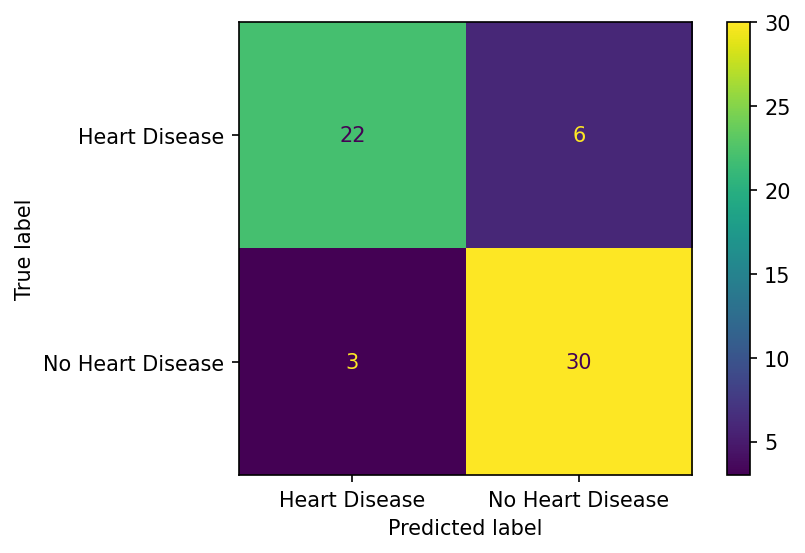

                  precision    recall  f1-score   support

   Heart Disease       0.88      0.79      0.83        28
No Heart Disease       0.83      0.91      0.87        33

        accuracy                           0.85        61
       macro avg       0.86      0.85      0.85        61
    weighted avg       0.85      0.85      0.85        61



In [182]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

n_test, d = X_test.shape

# Add a row of ones for the bias term
X_test = np.c_[np.ones((n_test,1)), X_test]

# predicting using the model
y_pred = log_reg.predict(X_test)

# specifing a threshold to label the predicted data
y_pred = np.where(y_pred > 0.5, 1, 0)

# creating and plotting the confusion matrix
log_confusion_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(log_confusion_matrix, display_labels=['Heart Disease', 'No Heart Disease'])
disp.plot()
plt.show()

# creating classification report
print(classification_report(y_test, y_pred, target_names=['Heart Disease', 'No Heart Disease']))

## Compairing the model with Sklearn

C:\Users\Reza\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


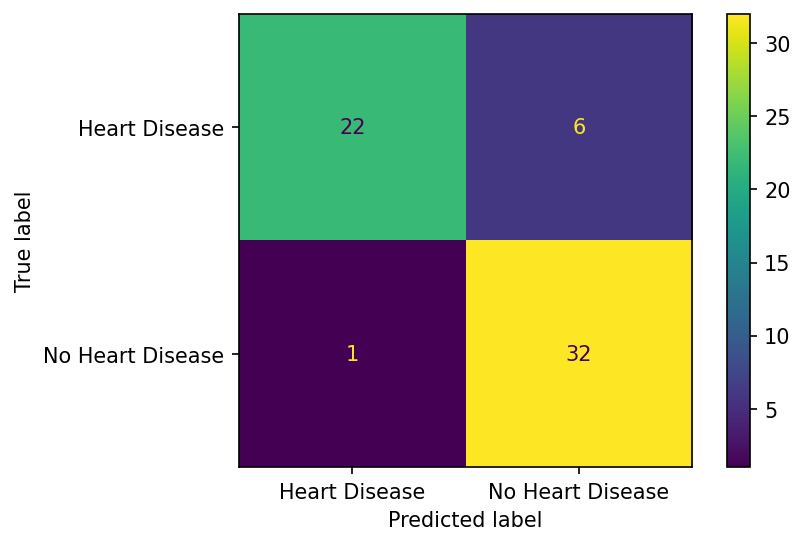

                  precision    recall  f1-score   support

   Heart Disease       0.96      0.79      0.86        28
No Heart Disease       0.84      0.97      0.90        33

        accuracy                           0.89        61
       macro avg       0.90      0.88      0.88        61
    weighted avg       0.89      0.89      0.88        61



In [183]:
from sklearn.linear_model import LogisticRegression as SK_LogisticRegression

sk_log_reg = SK_LogisticRegression()

sk_log_reg.fit(X_train, y_train)

sk_pred = sk_log_reg.predict(X_test)

# creating and plotting the confusion matrix
sk_confusion_matrix = confusion_matrix(y_test, sk_pred)
disp = ConfusionMatrixDisplay(sk_confusion_matrix, display_labels=['Heart Disease', 'No Heart Disease'])
disp.plot()
plt.show()

# creating classification report
print(classification_report(y_test, sk_pred, target_names=['Heart Disease', 'No Heart Disease']))

## Optimum Threshold

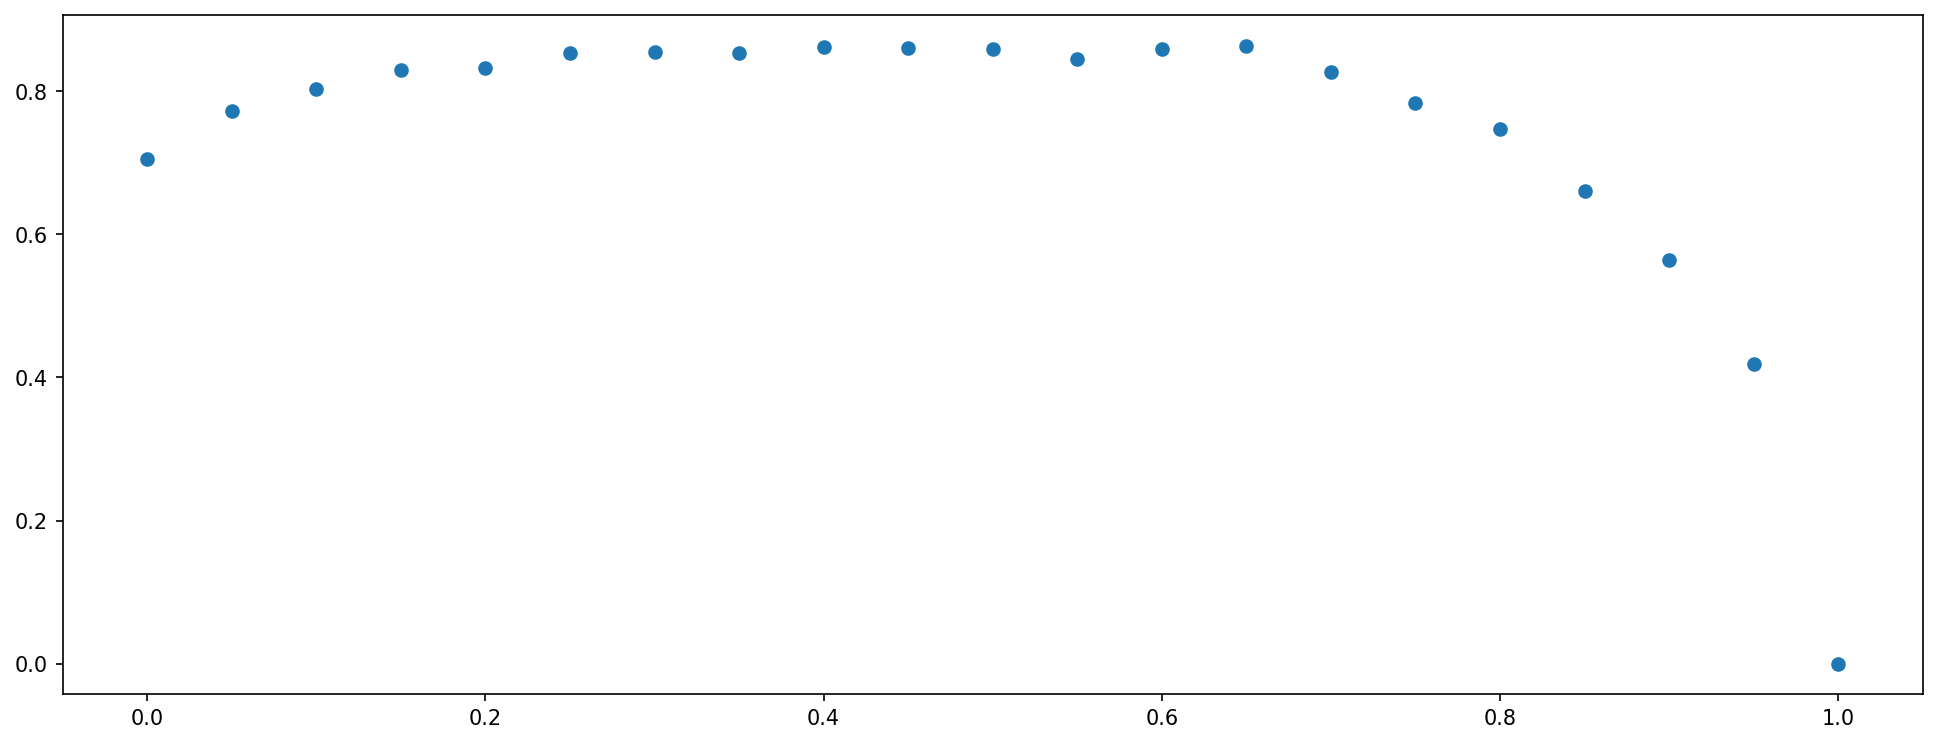

In [195]:
# gridsearch maximizing f1 score
from sklearn.metrics import f1_score
f1_dict = {'Threshold':[], 'f1_score':[]}
y_pred = log_reg.predict(X_train)

for threshold in np.arange(0, 1.05, 0.05):
    y_pred_new = np.where(y_pred > threshold, 1, 0)
    score = f1_score(y_train, y_pred_new)
    f1_dict['Threshold'].append(threshold)
    f1_dict['f1_score'].append(score)
    
plt.figure(figsize=(16, 6))
plt.scatter(f1_dict['Threshold'], f1_dict['f1_score'])

The optimum threshold is considered to be __0.4__ 

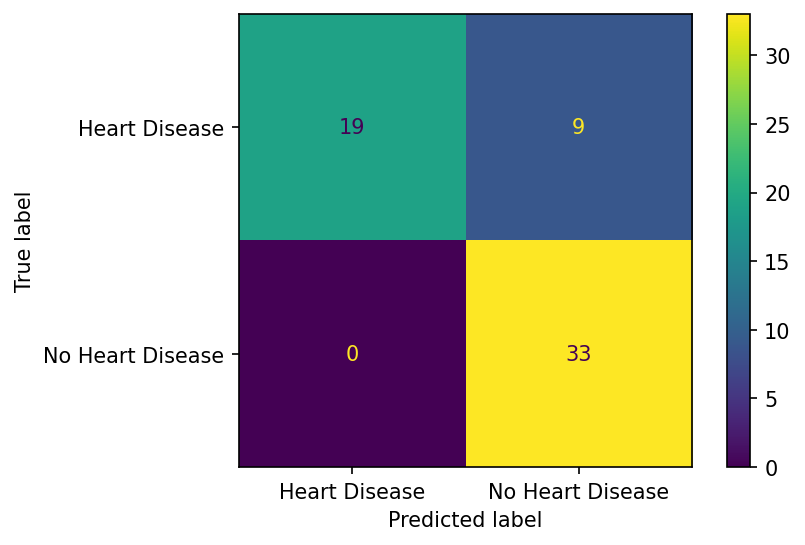

                  precision    recall  f1-score   support

   Heart Disease       1.00      0.68      0.81        28
No Heart Disease       0.79      1.00      0.88        33

        accuracy                           0.85        61
       macro avg       0.89      0.84      0.84        61
    weighted avg       0.88      0.85      0.85        61



In [199]:
# Validating the model with the optimum threshold

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

# predicting using the model
y_pred = log_reg.predict(X_test)

# specifing a threshold to label the predicted data
y_pred = np.where(y_pred > 0.4, 1, 0)

# creating and plotting the confusion matrix
log_confusion_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(log_confusion_matrix, display_labels=['Heart Disease', 'No Heart Disease'])
disp.plot()
plt.show()

# creating classification report
print(classification_report(y_test, y_pred, target_names=['Heart Disease', 'No Heart Disease']))